# Implementing Witness Complex in Python

Author: YinTaiChen

Reference 1: https://www.researchgate.net/publication/248117036_Topological_estimation_using_witness_complexes

Reference 2: http://gudhi.gforge.inria.fr/doc/latest/group__witness__complex.html

Reference 3: https://github.com/YinTaiChen/Topological-Data-Analysis/blob/master/Dionysus%20Tutorial.ipynb

![title](http://gudhi.gforge.inria.fr/doc/latest/Witness_complex_representation.png)

## Definition

Witness Complex is a simplicial complex defined on two sets of points in D-dimensional real-number space:

* __W__ set of __witnesses__ and

* __L__ set of __landmarks__.

Quite often the set of landmarks __L__ is a subset of the set of witnesses __W__.

Landmarks are the vertices of the simplicial complex and witnesses help to decide on which simplices are inserted via a predicate "is witnessed".

## The Witness Complex Abstract Data Type

The witness complex abstract data type is defined by the follwing structure and operations.

* __WitnessComplex(data, p_landmarks, p_witnesses, max_dim)__ creates a new witness complex.

* __sample_landmarks_and_witnesses()__ samples landmakrs and witnesses from the data points.

* __is_witnessed(compl)__ decides which simplex from compl to be inserted.

* __plot()__ plots the Witness Complex

The following blocks show how I implement it.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib

import seaborn as sns

from scipy.spatial import distance, distance_matrix
import itertools
from collections import defaultdict

In [2]:
class WitnessComplex:
    def __init__(self, data, p_landmarks, p_witnesses, max_dim=2):
        self.data = data
        self.p_landmarks = p_landmarks
        self.p_witnesses = p_witnesses
        self.max_dim = max_dim
        
        self.complex_list = []
        self.witness_list = []
        self.simplexes_dims = defaultdict(int)
        
        self.sample_landmarks_and_witnesses()
        
        for d in [0, 1, 2]:
            for compl in itertools.combinations(self.landmarks, d+1):
                self.simplexes_dims[d] += self.is_witnessed(compl)
    
    def sample_landmarks_and_witnesses(self):
        data_index_list = np.arange(len(self.data))
        landmark_sample_size = int(np.floor(self.p_landmarks * self.data.shape[0]))
        witness_sample_size = int(np.floor(self.p_witnesses * self.data.shape[0]))
        
        landmark_idx = np.random.choice(data_index_list,
                                        size = landmark_sample_size,
                                        replace = False)
        
        data_index_list_minus_landmarks = np.setdiff1d(data_index_list,
                                                       landmark_idx,
                                                       assume_unique = True)
        
        witness_idx = np.random.choice(data_index_list_minus_landmarks,
                                       size = witness_sample_size,
                                       replace = False)
        
        self.landmarks = self.data[landmark_idx]
        self.witnesses = self.data[witness_idx]
        
    def is_witnessed(self, compl):
        used_landmarks = [x for x in self.landmarks
                          if not (compl==x).all(axis=1).any()]
        
        for witness in self.witnesses:
            lhs = distance_matrix(np.array([witness]), np.array(compl))
            rhs = distance_matrix(np.array([witness]), used_landmarks)
            if all(i - j <= 0 for i in lhs[0] for j in rhs[0]):
                self.witness_list.append(witness)
                self.complex_list.append(compl)
                return True
        return False
    
    def plot(self):        
        if self.complex_list:
            
            self.complex_list = sorted(self.complex_list, key=lambda x: len(x), reverse=True)
            
            for compl in self.complex_list:
                compl = np.array(compl)
                dim = compl.shape[0]
                if dim == 1:
                    x = compl[0][0]
                    y = compl[0][1]
                    plt.plot(x, y, 'ro')
                elif dim == 2:
                    x = compl[:,0]
                    y = compl[:,1]
                    plt.plot(x, y, '-')
                elif dim == 3:
                    x = compl[:,0]
                    y = compl[:,1]
                    z = np.sin(x)+np.cos(y)
                    plt.tripcolor(x, y, z)                   
        plt.show()

## And it works this way

Create 100 random 2D ponts:

In [3]:
data = np.random.random((100, 2))

Create a Witness Complex using the data and some parameters:

In [4]:
c = WitnessComplex(data, p_landmarks=0.20, p_witnesses=0.20)

Plot the Witness Complex that we just created:

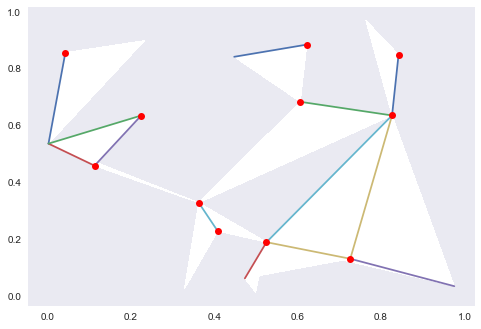

In [5]:
c.plot()

Check out the complexes in the complex list:

In [6]:
for compl in c.complex_list:
    print(compl)

(array([ 0.23321089,  0.89822702]), array([ 0.00293821,  0.5355044 ]), array([ 0.04338431,  0.85580779]))
(array([ 0.84184436,  0.84850299]), array([ 0.76347071,  0.96928536]), array([ 0.82626644,  0.63472798]))
(array([ 0.32851597,  0.02381194]), array([ 0.40841927,  0.22767935]), array([ 0.36296399,  0.32748802]))
(array([ 0.60642187,  0.68271261]), array([ 0.82626644,  0.63472798]), array([ 0.36296399,  0.32748802]))
(array([ 0.60642187,  0.68271261]), array([ 0.44805029,  0.84118377]), array([ 0.62201682,  0.88413196]))
(array([ 0.11337972,  0.45786487]), array([ 0.00293821,  0.5355044 ]), array([ 0.22503983,  0.63436637]))
(array([ 0.11337972,  0.45786487]), array([ 0.00293821,  0.5355044 ]), array([ 0.36296399,  0.32748802]))
(array([ 0.82626644,  0.63472798]), array([ 0.72613474,  0.130187  ]), array([ 0.97545567,  0.03363093]))
(array([ 0.82626644,  0.63472798]), array([ 0.72613474,  0.130187  ]), array([ 0.52535364,  0.18855419]))
(array([ 0.4735303 ,  0.06121462]), array([ 0.

Check out the witnesses in the witness list:

In [7]:
for witness in c.witness_list:
    print(witness)

[ 0.93976962  0.78203483]
[ 0.64479454  0.50376949]
[ 0.03927529  0.43300456]
[ 0.81450869  0.37490934]
[ 0.00140214  0.78489008]
[ 0.72176325  0.22707928]
[ 0.3920103   0.27203325]
[ 0.15216427  0.66045959]
[ 0.53868518  0.13283919]
[ 0.60923079  0.86292846]
[ 0.20361806  0.22760524]
[ 0.93976962  0.78203483]
[ 0.64479454  0.50376949]
[ 0.03927529  0.43300456]
[ 0.15532461  0.50219957]
[ 0.88674061  0.33575317]
[ 0.67010389  0.40431166]
[ 0.00140214  0.78489008]
[ 0.15216427  0.66045959]
[ 0.53868518  0.13283919]
[ 0.8214612   0.28807724]
[ 0.72176325  0.22707928]
[ 0.3920103   0.27203325]
[ 0.60923079  0.86292846]
[ 0.00140214  0.78489008]
[ 0.93976962  0.78203483]
[ 0.20361806  0.22760524]
[ 0.64479454  0.50376949]
[ 0.60923079  0.86292846]
[ 0.03927529  0.43300456]
[ 0.1443168   0.41307128]
[ 0.88674061  0.33575317]
[ 0.81450869  0.37490934]
[ 0.72176325  0.22707928]
[ 0.53868518  0.13283919]
[ 0.8214612   0.28807724]
[ 0.3920103   0.27203325]
